<h1><center>Case Study for Data Analyst Professional Certification</center></h1>


#### About the data:
- This project was the Case Study needed for __Datacamp Data Analyst Professional Certification__.
- For more information about this certification, __[Click Here](https://www.datacamp.com/certification/data-analyst)__
- For more information about the requirments for this project, __[Click Here](https://github.com/Fawzy-Almatary/Portfolio-Projects/blob/main/Travel_Insurance/DA_Case_Study_Insurance_Prework.pdf)__
- For the presentation file used in the oral presentation, __[Click Here](https://github.com/Fawzy-Almatary/Portfolio-Projects/blob/main/Travel_Insurance/Travel_Insurance%20Presentation.pdf)__


#### The project is:
- __Travel Assured__ is a travel insurance company. Due to the COVID pandemic, they have had to cut their marketing budget by over 50%. It is more important than ever that they advertise in the right places and to the right people.<br>
- Travel Assured has plenty of data on their current customers as well as people who got
quotes but never bought insurance.<br>
- __Customer Question__: They want to know:

    1. Are there differences in the travel habits between customers and non-customers?
    2. What is the typical profile of customers and non-customers?

In [1]:
# Import the packages that will be needed in this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Define some setting across all plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['axes.titlesize'] = 16

In [2]:
# Import the data
url = 'https://raw.githubusercontent.com/Fawzy-Almatary/Portfolio-Projects/main/Travel_Insurance/travel_insurance.csv'
df = pd.read_csv(url)

# Have a quick look at the data
df.sample(5, random_state=5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1268,33,Government Sector,Yes,1000000,5,0,No,Yes,1
33,32,Government Sector,Yes,850000,3,0,No,No,0
599,34,Private Sector/Self Employed,Yes,700000,4,1,No,No,0
432,34,Private Sector/Self Employed,Yes,500000,5,0,No,No,0
1073,28,Private Sector/Self Employed,Yes,500000,7,0,No,No,0


In [3]:
# Check the data for any missing values or wrong column types

print(f"""
Total missing values in the data are {df.isnull().sum().sum()} items.\n
Shape of data is {df.shape}.\n
Column names with their data types is:\n\n{df.dtypes}
""")

df.describe().T


Total missing values in the data are 0 items.

Shape of data is (1987, 9).

Column names with their data types is:

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object



,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [4]:
# Change the name values of 'TravelInsurance' column from (0, 1) to ("Non-Customer", "Customer")

df["TravelInsurance"].replace({0: "Non-Customer", 1: "Customer"}, inplace=True)

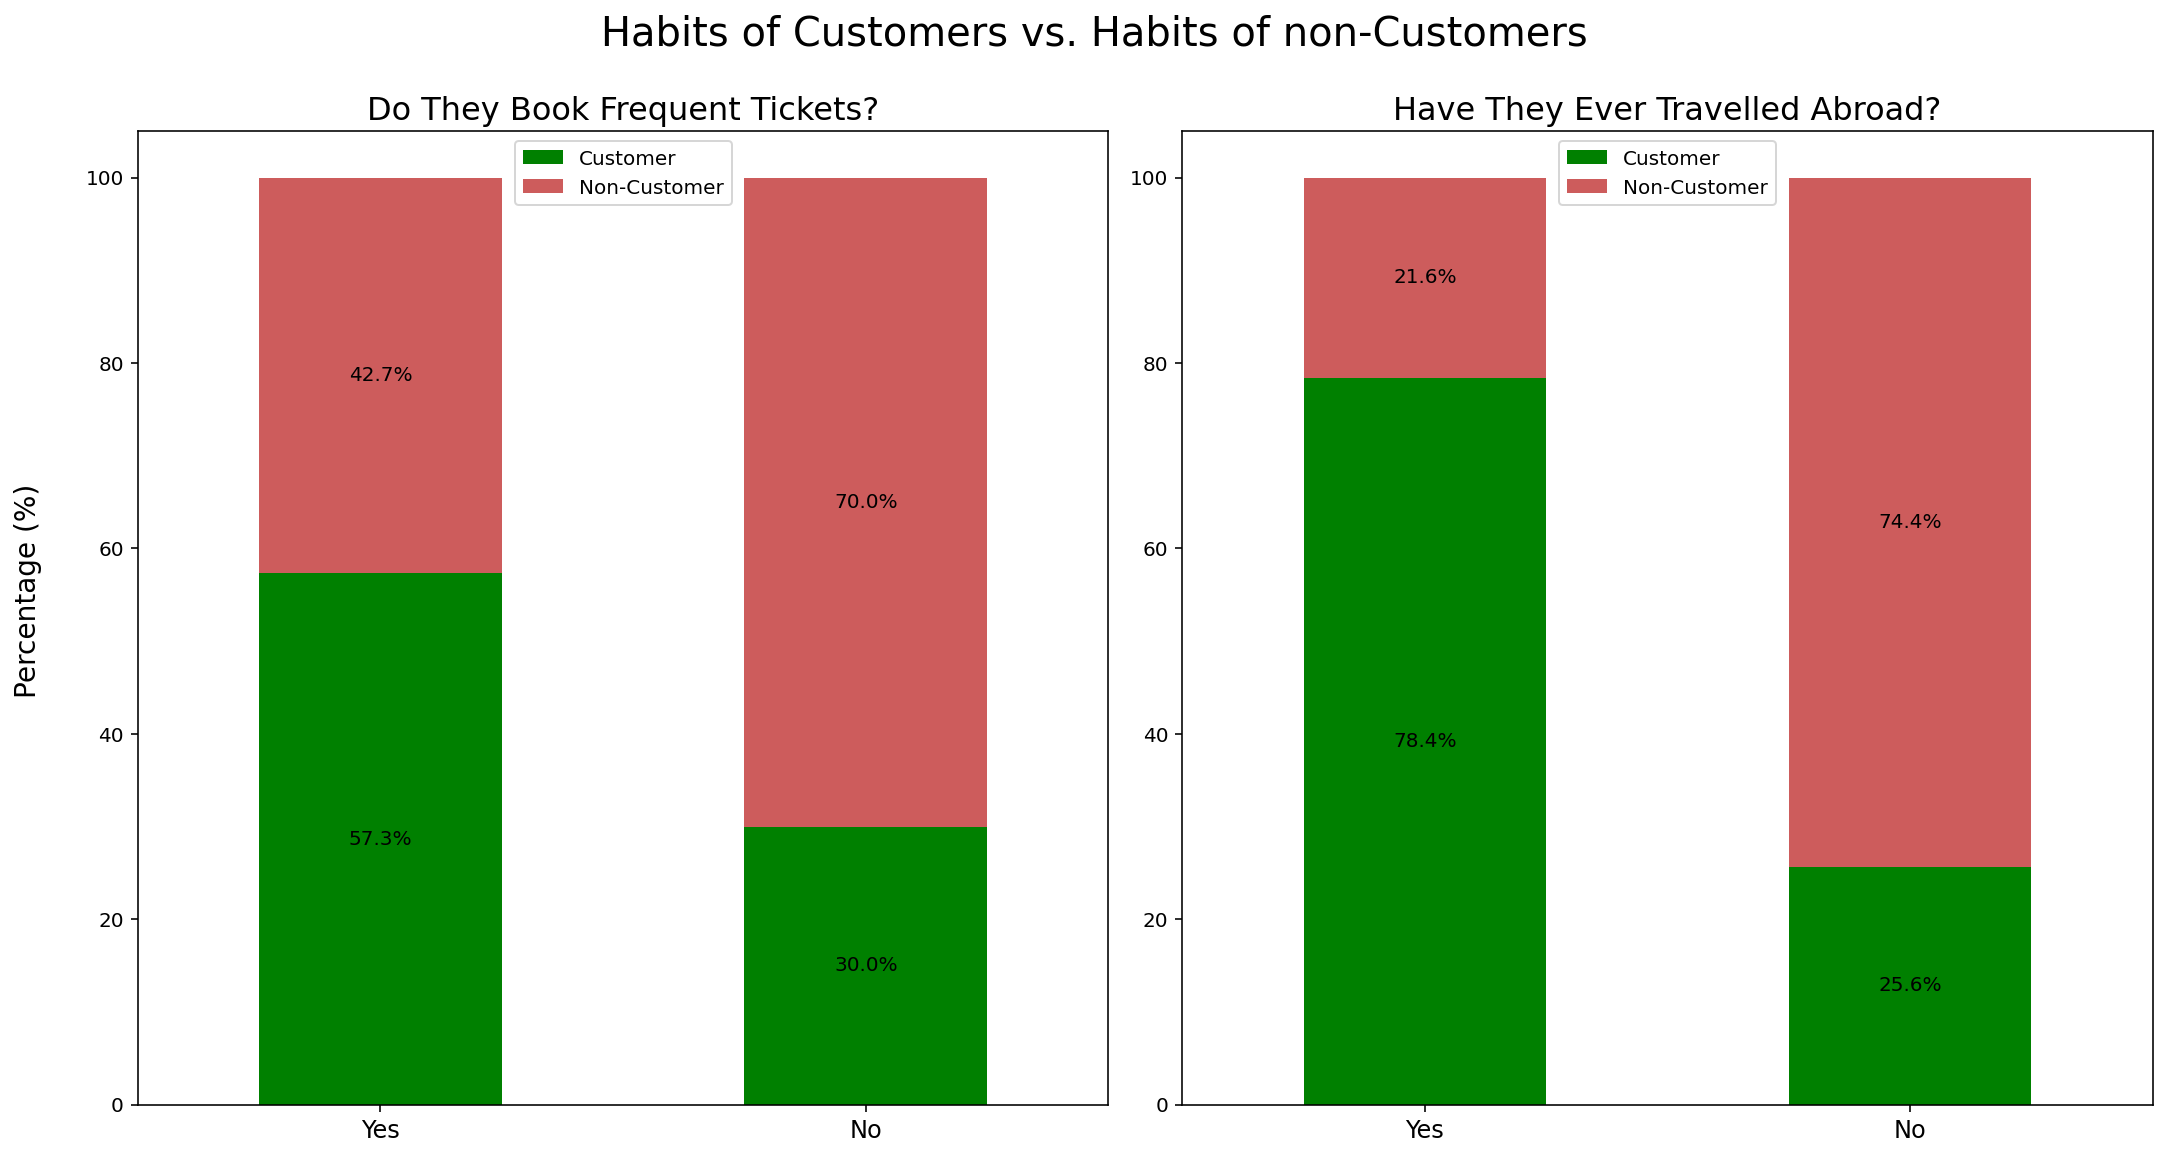

In [5]:
# Answering the first question:
# 1. Are there differences in the travel habits between customers and non-customers?

# Plotting Habits of Customers vs. Habits of non-Customers

fig, ax = plt.subplots(1,2, figsize=(15,8))

pd.crosstab(df['FrequentFlyer'], df['TravelInsurance'],  normalize='index').apply(lambda r: r*100).loc[['Yes', 'No']]\
            .plot(kind="bar", stacked=True, color=['green', 'indianred'], ax=ax[0])\
            .set(title='Do They Book Frequent Tickets?')
pd.crosstab(df['EverTravelledAbroad'], df['TravelInsurance'],  normalize='index').apply(lambda r: r*100).loc[['Yes', 'No']]\
            .plot(kind="bar", stacked=True, color=['green', 'indianred'], ax=ax[1])\
            .set(title='Have They Ever Travelled Abroad?')

for p in ax[0].containers:
    ax[0].bar_label(p, fmt='%.1f%%', label_type='center')
for p in ax[1].containers:
    ax[1].bar_label(p, fmt='%.1f%%', label_type='center')
for ax in ax.flat:
    ax.set(xlabel=None, ylabel=None)
    ax.tick_params(axis='x', labelrotation=0,labelsize='large')
    ax.legend(loc='upper center', labels=['Customer', 'Non-Customer'])
    
fig.suptitle('Habits of Customers vs. Habits of non-Customers', fontsize=20, y=1)
fig.supylabel('Percentage (%)', fontsize=14, x=0)
fig.tight_layout()

plt.savefig('habitsofcustomers.png', transparent=True)
plt.show()

##### From the above two graphs, we can see that there are indeed differences in the travel habits between customers and non-customers:
- People who travel frequently are more likely to buy insurance and be customers.
- Most people who travelled abroad before are customers.<br>
<br>
- So, customers tend to travel more frequently and have higher chances to travelling abroad.



- __Now let's dig deeper to find the answer to the second question.__
- 2. What is the typical profile of customers and non-customers?

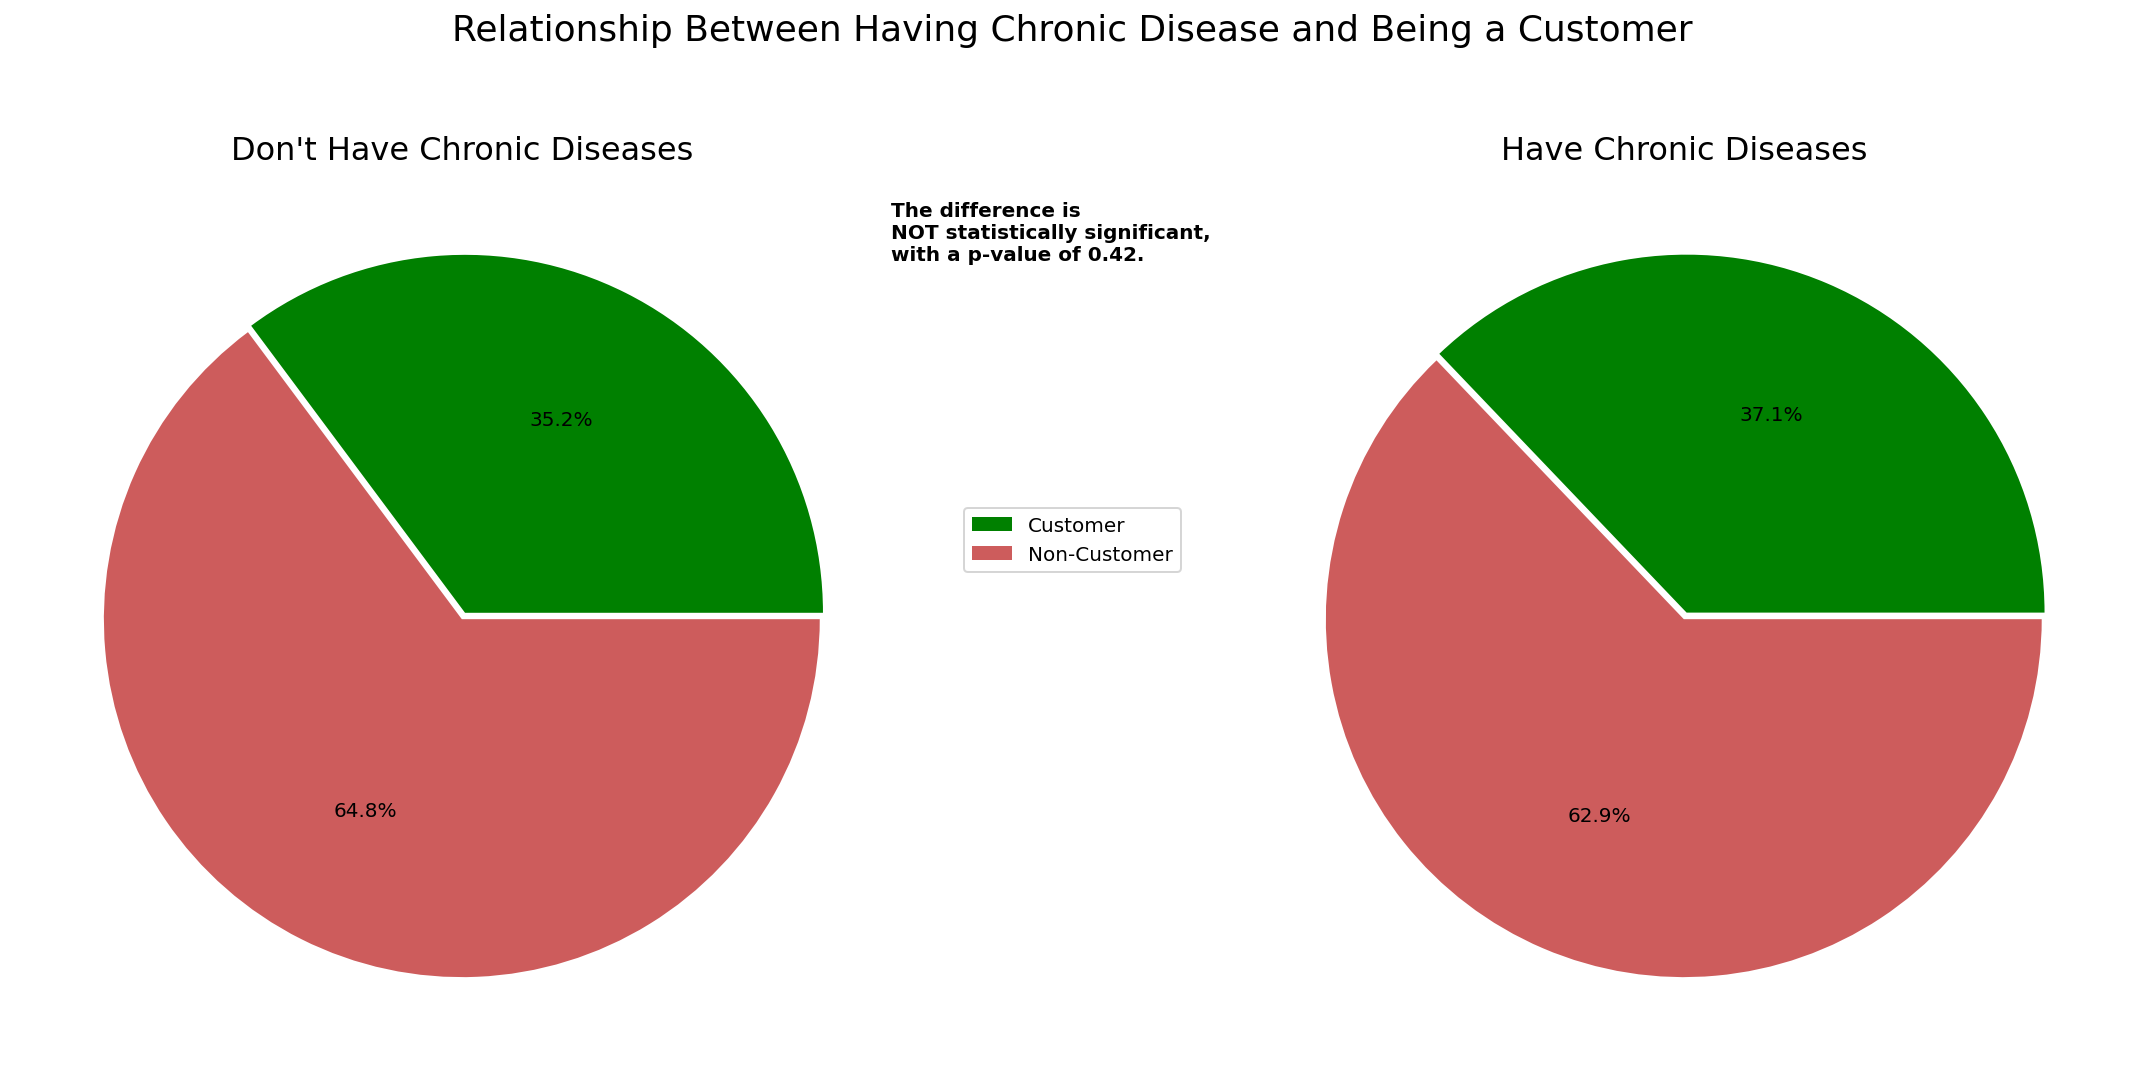

In [6]:
# Firstly, let's see if there is an association between having a chronic disease and being a customer or not:

ChronicDiseases = pd.crosstab(df['TravelInsurance'], df['ChronicDiseases'], normalize='columns').apply(lambda r: r*100).reset_index()
p_value1 = round(sm.stats.ttest_ind(df[df['TravelInsurance'] == 'Non-Customer']["ChronicDiseases"],df[df['TravelInsurance'] == 'Customer']["ChronicDiseases"])[1], 2)

fig, ax = plt.subplots(1,2, figsize=(15,8))
ChronicDiseases[0].plot(kind='pie', autopct='%.1f%%', ax=ax[0], explode=(0.02,0), colors=['green', 'indianred'], labels=None)\
            .set(xlabel=None, ylabel=None, title='Don\'t Have Chronic Diseases')
ChronicDiseases[1].plot(kind='pie', autopct='%.1f%%', ax=ax[1],  explode=(0.02,0),colors=['green', 'indianred'], labels=None)\
            .set(xlabel=None, ylabel=None,title='Have Chronic Diseases')


ax[0].annotate(f"The difference is\nNOT statistically significant,\nwith a p-value of {p_value1}.",\
               xy=(1.2, 1), weight='bold')

fig.suptitle('Relationship Between Having Chronic Disease and Being a Customer', fontsize=18, y=1)

plt.figlegend(loc='center', labels=['Customer', 'Non-Customer'])
fig.tight_layout()
plt.savefig('chronicdiseases.png', transparent=True)

plt.show()

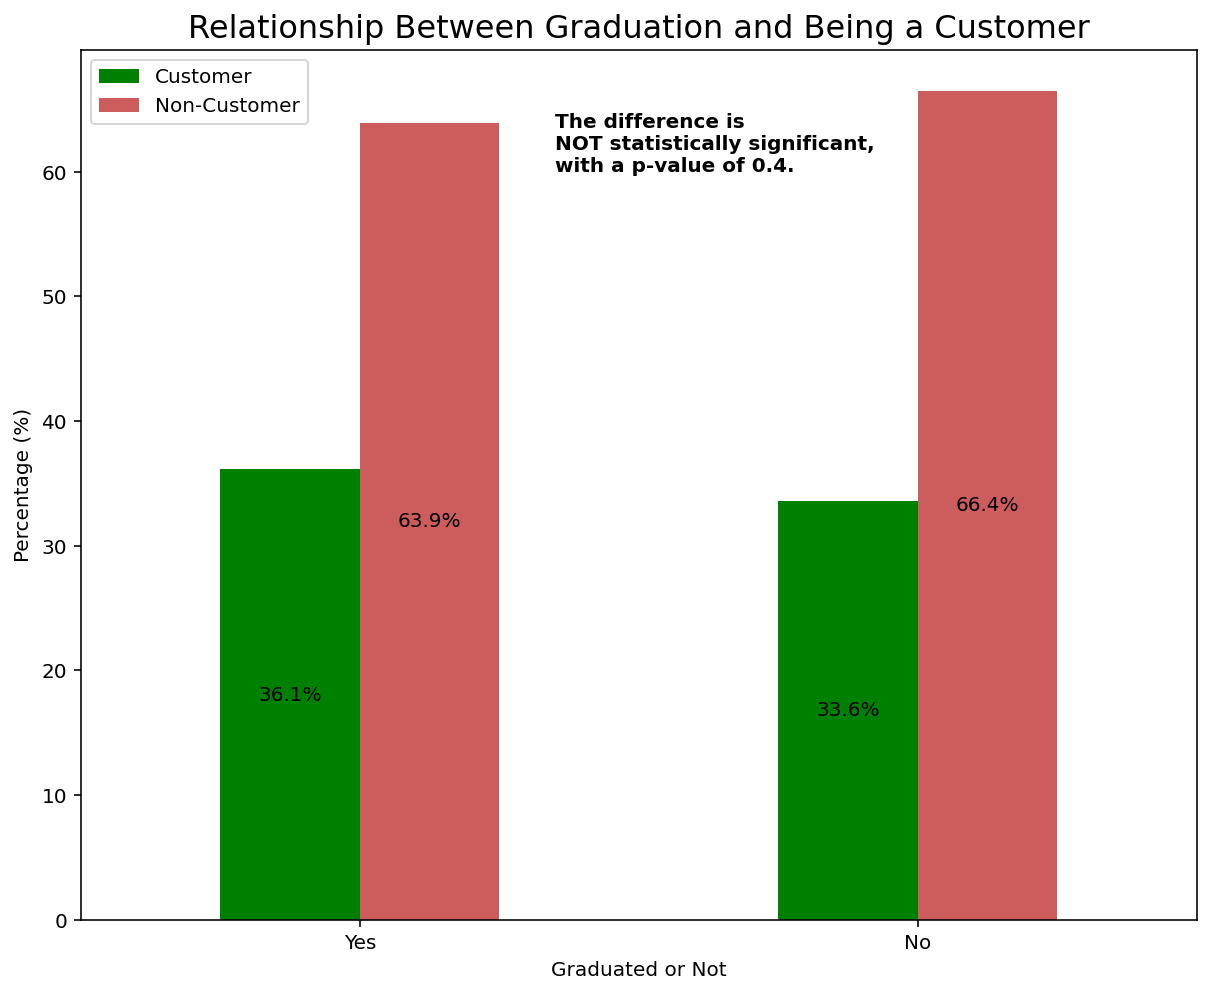

In [7]:
# Secondly, lets analyze the relationship between graduating and being a customer
dfgrad = df[['TravelInsurance', 'GraduateOrNot']].copy().replace({'Yes': 1, 'No':0})
p_value2 = round(sm.stats.ttest_ind(dfgrad[dfgrad['TravelInsurance'] == 'Non-Customer']["GraduateOrNot"],dfgrad[dfgrad['TravelInsurance'] == 'Customer']["GraduateOrNot"])[1], 2)

ax = pd.crosstab(df['GraduateOrNot'], df['TravelInsurance'], normalize='index').apply(lambda r: r*100)\
        .loc[['Yes', 'No'],['Customer', 'Non-Customer']].plot.bar(color=['green', 'indianred']\
        ,ylabel='Percentage (%)', xlabel='Graduated or Not', title='Relationship Between Graduation and Being a Customer')

plt.tick_params(axis='x', labelrotation=0)

for p in ax.containers:
    ax.bar_label(p, fmt='%.1f%%', label_type='center')

plt.annotate(f"The difference is\nNOT statistically significant,\nwith a p-value of {p_value2}.",\
               xy=(0.35 ,60), weight='bold')
    
plt.legend(loc='upper left', labels=['Customer', 'Non-Customer'])

plt.savefig('graduation.png', transparent=True)
plt.show()

- As shown in the above plots:
    - For chronic diseases, the percentage of customers is 35.2% and 37.1% for those who do not have any chronic diseases and those who have respectively.
    - About graduation, the percentage of customers is 36.1% and 33.6% for those who do have graduated and those who have not graduated yet respectively.
- To assess whether the difference between the proportions of the two groups is significant, a statistical t-test was used to compare the two proportions.
    - The p-value (a value that quantifies the statistical significance of a result) is 0.42 for comparing the proportions of those who have chronic diseases and those who are not.
    - The p-value for the test analyzing the relationship between graduating and being a customer is 0.4.
- Which means that  for both of them, __there is no significant difference between the two groups__.
- In other words:
    - Having a chronic disease have no correlation with being a customer or not.
    - Being graduated or not have no correlation with being a customer or not.

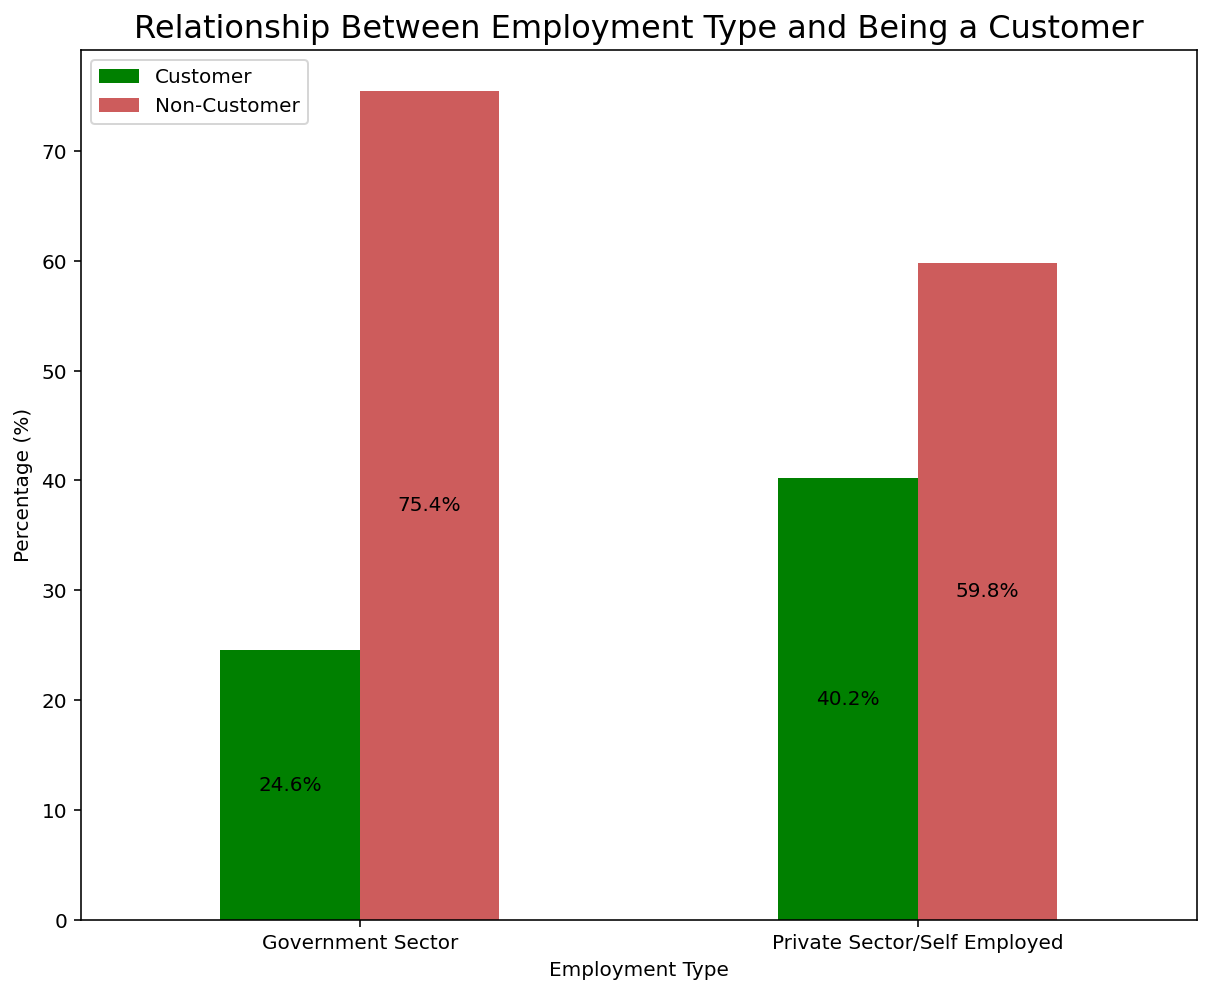

In [8]:
# Then, lets analyze the relationship between employment type and being a customer

ax = pd.crosstab(df['Employment Type'], df['TravelInsurance'], normalize='index').apply(lambda r: r*100)\
        .loc[:,['Customer', 'Non-Customer']].plot.bar(color=['green', 'indianred']\
        ,ylabel='Percentage (%)', title='Relationship Between Employment Type and Being a Customer')
plt.tick_params(axis='x', labelrotation=0)

for p in ax.containers:
    ax.bar_label(p, fmt='%.1f%%', label_type='center')
    
plt.legend(loc='upper left', labels=['Customer', 'Non-Customer'])

plt.savefig('employment.png', transparent=True)
plt.show()

- Only few percent of those who work in government sector (24.6%) are customers, in contrast with 40.2% of those who work in private sector or self-employed.
- So, working in private sector or __being self-employed increases the chances of being a customer__.

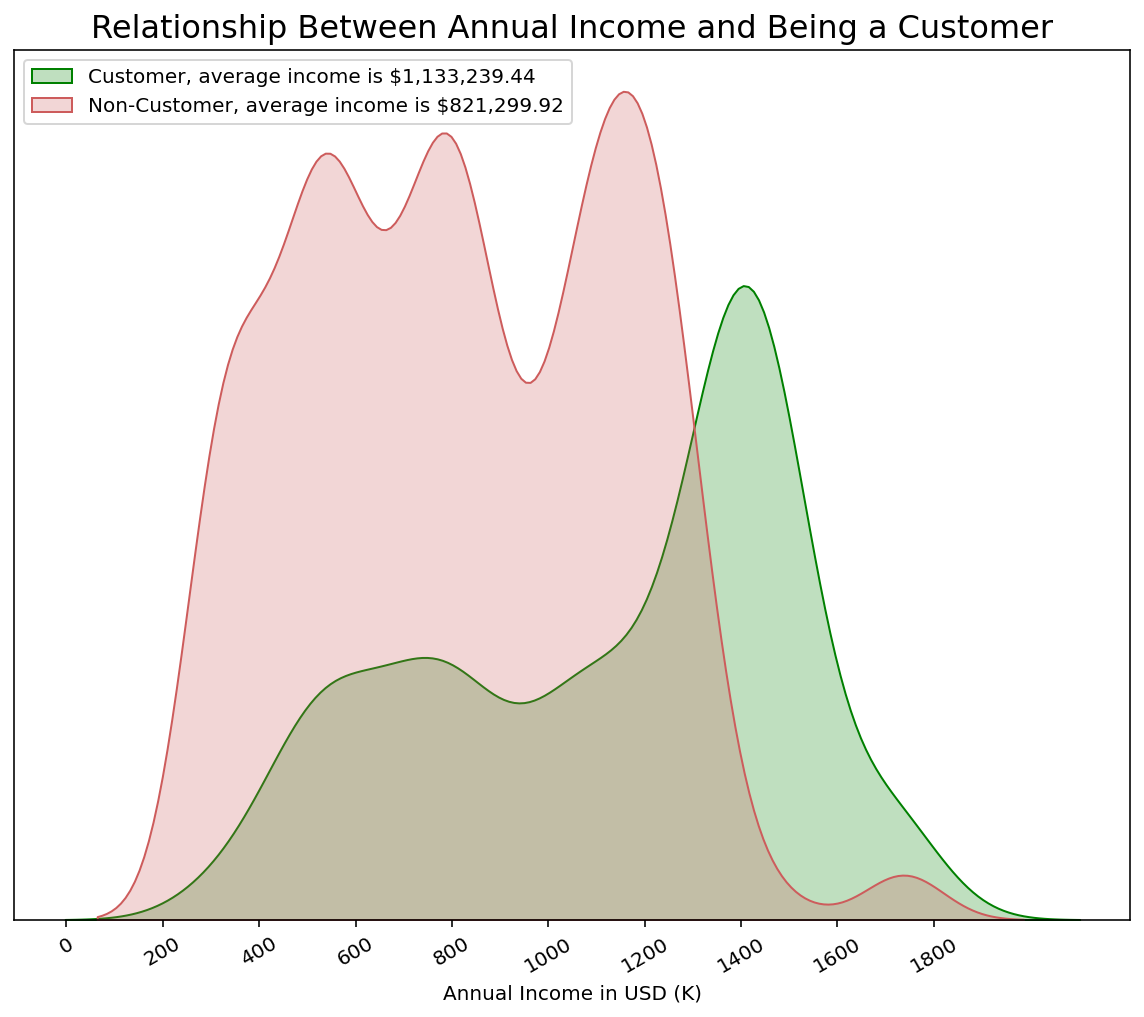

In [9]:
# Now, let's see the effect of income on being a customet or not

AvgCusInx = "${:,.2f}".format(round(df[df['TravelInsurance'] == 'Customer']['AnnualIncome'].mean(), 2))
AvgNonInx = "${:,.2f}".format(round(df[df['TravelInsurance'] == 'Non-Customer']['AnnualIncome'].mean(), 2))

sns.kdeplot(data=df, x='AnnualIncome', hue='TravelInsurance', fill=True, palette={'Customer':'green', 'Non-Customer':'indianred'})\
           .set(title='Relationship Between Annual Income and Being a Customer', xlabel='Annual Income in USD (K)',ylabel=None,\
                xticks=range(0,2000000,200000), xticklabels=range(0,2000,200), yticklabels='')
    
plt.tick_params(left=False)
plt.tick_params(axis='x', labelrotation=30)
plt.legend(loc='upper left', labels=[f"Customer, average income is {AvgCusInx}", f"Non-Customer, average income is {AvgNonInx}"])

plt.savefig('income.png', transparent=True)
plt.show()

As shown from the above Kernel Distribution Estimation Plot, it is evident that __those who earn higher are more likely to be customers__.

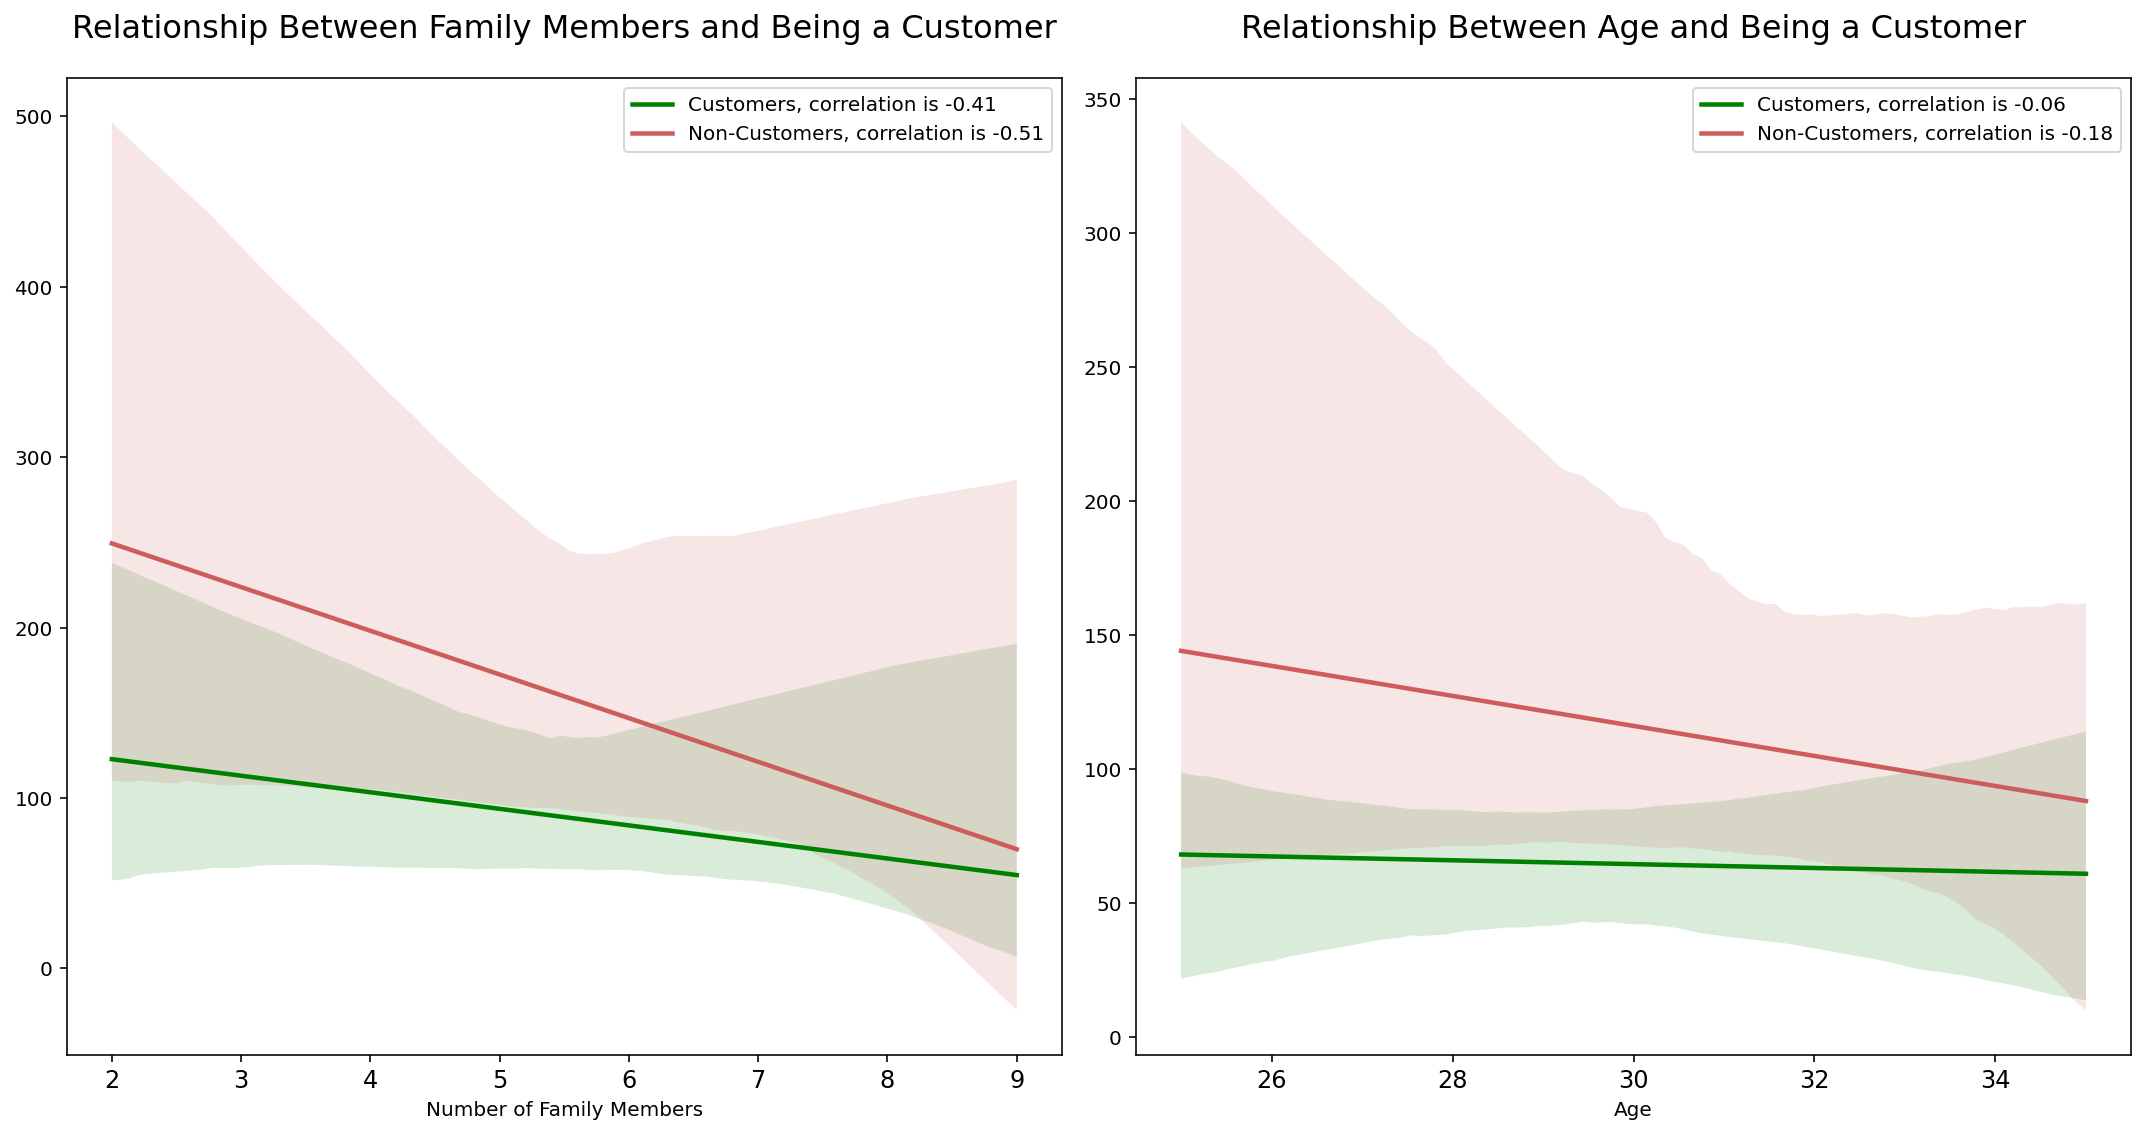

In [10]:
# Lastly, let's see the relationship between age and family members with being a customer.

FamilyMembers = pd.crosstab(df['FamilyMembers'], df['TravelInsurance']).reset_index()
corr_fy = round(FamilyMembers['FamilyMembers'].corr(FamilyMembers['Customer']),2)
corr_fn = round(FamilyMembers['FamilyMembers'].corr(FamilyMembers['Non-Customer']),2)

Age = pd.crosstab(df['Age'], df['TravelInsurance']).reset_index()
corr_ay = round(Age['Age'].corr(Age['Customer']),2)
corr_an = round(Age['Age'].corr(Age['Non-Customer']),2)

fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.regplot(data = FamilyMembers, x='FamilyMembers', y='Customer', ax=ax[0],\
            marker='x', scatter=False, color='green', label=f"Customers, correlation is {corr_fy}")
sns.regplot(data = FamilyMembers, x='FamilyMembers', y='Non-Customer', ax=ax[0],\
            marker='p', scatter=False, color='indianred', label=f"Non-Customers, correlation is {corr_fn}")

sns.regplot(data = Age, x='Age', y='Customer', ax=ax[1],\
            marker='x', scatter=False, color='green', label=f"Customers, correlation is {corr_ay}")
sns.regplot(data = Age, x='Age', y='Non-Customer', ax=ax[1],\
            marker='p', scatter=False, color='indianred', label=f"Non-Customers, correlation is {corr_an}")

ax[0].set_title('Relationship Between Family Members and Being a Customer', fontsize=16, pad=20)
ax[0].set_xlabel('Number of Family Members')
ax[1].set_title('Relationship Between Age and Being a Customer', fontsize=16, pad=20)    
ax[1].set_xlabel('Age')

for ax in ax.flat:
    ax.set(ylabel=None)
    ax.tick_params(axis='x', labelrotation=0,labelsize='large')
    ax.legend(loc='upper right')
    

fig.tight_layout()
plt.savefig('family_age.png', transparent=True)
plt.show()

With the increase in either age or number of family members, the rate of being a customer becomes lower. There is a __negative correlation__ between them. But it seems that negative correlation is weaker when it comes to increasing age compared to increasing family size.

### Recommendations:
- According to the findings in this analysis, for Travel Assured to get the best out of advertising with the limited budget, what should be done is:
    - Try to target:
        1. The people who travel abroad as they are more likely to be customers.
        2. The people who are self-employed or work in private sectors.
        3. Those who have fewer family members.
    - Do not waste resources on:
        1. Trying to target people according to their health, whether they have chronic diseases or not.
        2. Trying to target a specific age or education level.    